# Predict the critical temperature based on the features extracted using Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')


In [3]:
dataset.head()
#

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [5]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

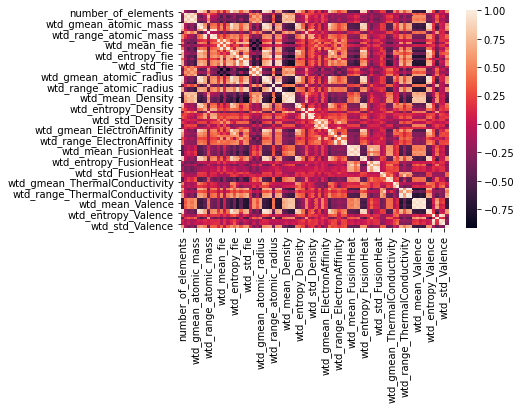

In [6]:
sns.heatmap(dataset.corr())

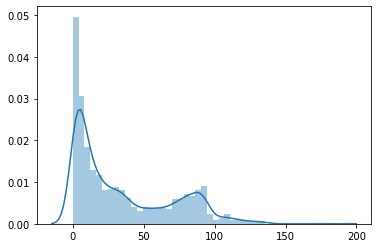

In [7]:
 sns.distplot(dataset.critical_temp.values)

### Splitting the dataset into the Training set and Test set

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature 0: 8270.247
Feature 1: 200.804
Feature 2: 1535.869
Feature 3: 830.974
Feature 4: 2248.899
Feature 5: 6033.692
Feature 6: 9287.309
Feature 7: 4644.982
Feature 8: 1788.963
Feature 9: 2466.016
Feature 10: 2148.102
Feature 11: 165.685
Feature 12: 2652.741
Feature 13: 5.572
Feature 14: 1876.779
Feature 15: 6911.458
Feature 16: 2678.654
Feature 17: 8097.093
Feature 18: 1334.750
Feature 19: 5929.856
Feature 20: 7276.623
Feature 21: 138.663
Feature 22: 1351.872
Feature 23: 323.351
Feature 24: 2748.663
Feature 25: 6611.153
Feature 26: 8269.777
Feature 27: 10546.784
Feature 28: 1889.016
Feature 29: 6377.008
Feature 30: 7855.111
Feature 31: 2238.688
Feature 32: 3254.896
Feature 33: 5878.567
Feature 34: 5814.165
Feature 35: 3810.654
Feature 36: 2756.663
Feature 37: 1118.730
Feature 38: 1221.404
Feature 39: 225.774
Feature 40: 689.736
Feature 41: 533.649
Feature 42: 173.171
Feature 43: 2419.131
Feature 44: 178.193
Feature 45: 3407.697
Feature 46: 910.226
Feature 47: 1265.654
Feature 48: 469

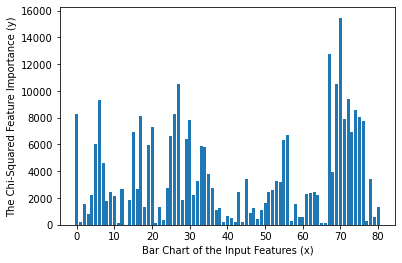

In [9]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# feature selection
def select_features(X_train, y_train, X_test):

# define number of features to evaluate
    num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
    results = list()
    for k in num_features:
        fs = SelectKBest(score_func=f_regression, k= k)
	# learn relationship from training data
        fs.fit(X_train, y_train)
	# transform train input data
        X_train_fs = fs.transform(X_train)
	# transform test input data
        X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %.3f' % (i, np.mean(fs.scores_[i])) ) 
    
    # plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel("Bar Chart of the Input Features (x)")
plt.ylabel("The Chi-Squared Feature Importance (y)")
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.layers import GaussianNoise
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
import os

#Building the ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=256, input_dim=81, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='he_uniform'))
#ann.add(tf.keras.layers.Dense(units=512, input_dim=81, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
#ann.add(tf.keras.layers.Dense(units=256, input_dim=81, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, input_dim=81, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='he_uniform'))
ann.add(tf.keras.layers.Dropout(0.3))
#ann.add(tf.keras.layers.Dense(units=128, input_dim=81, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, input_dim=81, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='he_uniform'))
ann.add(tf.keras.layers.Dropout(0.3))
#ann.add(tf.keras.layers.Dense(units=128, input_dim=81, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, input_dim=81, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='he_uniform'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=1))

opt = SGD(lr=0.01, momentum=0.9)
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

# Compile model (required to make predictions)
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Define callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
        
# Training the ANN model on the Training set
history = ann.fit(X_train_fs, y_train, validation_split=0.33, epochs = 300, verbose=1, callbacks=[es, mc])

Epoch 1/300
299/299 [==============================] - 1s 5ms/step - loss: 454.1880 - val_loss: 368.4374
Epoch 2/300
299/299 [==============================] - 1s 4ms/step - loss: 330.6537 - val_loss: 282.5222
Epoch 3/300
299/299 [==============================] - 1s 3ms/step - loss: 321.6976 - val_loss: 318.1530
Epoch 4/300
299/299 [==============================] - 1s 4ms/step - loss: 296.1646 - val_loss: 274.1072
Epoch 5/300
299/299 [==============================] - 1s 4ms/step - loss: 286.7753 - val_loss: 246.3215
Epoch 6/300
299/299 [==============================] - 1s 4ms/step - loss: 276.2623 - val_loss: 220.1623
Epoch 7/300
299/299 [==============================] - 1s 3ms/step - loss: 274.1602 - val_loss: 234.1776
Epoch 8/300
299/299 [==============================] - 1s 4ms/step - loss: 270.7938 - val_loss: 229.3736
Epoch 9/300
299/299 [==============================] - 1s 4ms/step - loss: 270.5025 - val_loss: 254.2437
Epoch 10/300
299/299 [==============================] -

299/299 [==============================] - 1s 4ms/step - loss: 171.1106 - val_loss: 159.3372
Epoch 79/300
299/299 [==============================] - 1s 3ms/step - loss: 164.2473 - val_loss: 158.2332
Epoch 80/300
299/299 [==============================] - 1s 3ms/step - loss: 165.2678 - val_loss: 146.8378
Epoch 81/300
299/299 [==============================] - 1s 4ms/step - loss: 165.1034 - val_loss: 157.2472
Epoch 82/300
299/299 [==============================] - 1s 4ms/step - loss: 159.4768 - val_loss: 148.9194
Epoch 83/300
299/299 [==============================] - 1s 3ms/step - loss: 169.4962 - val_loss: 148.1043
Epoch 84/300
299/299 [==============================] - 1s 3ms/step - loss: 161.9497 - val_loss: 148.0834
Epoch 85/300
299/299 [==============================] - 1s 3ms/step - loss: 160.3741 - val_loss: 151.8320
Epoch 86/300
299/299 [==============================] - 1s 3ms/step - loss: 157.0122 - val_loss: 148.5101
Epoch 87/300
299/299 [==============================] - 1s 

Epoch 155/300
299/299 [==============================] - 2s 5ms/step - loss: 146.7924 - val_loss: 147.5609
Epoch 156/300
299/299 [==============================] - 1s 4ms/step - loss: 146.7041 - val_loss: 151.8194
Epoch 157/300
299/299 [==============================] - 1s 4ms/step - loss: 146.6034 - val_loss: 144.4843
Epoch 158/300
299/299 [==============================] - 1s 4ms/step - loss: 141.6372 - val_loss: 142.0413
Epoch 159/300
299/299 [==============================] - 1s 4ms/step - loss: 144.2549 - val_loss: 143.1099
Epoch 160/300
299/299 [==============================] - 1s 4ms/step - loss: 147.3905 - val_loss: 155.6582
Epoch 161/300
299/299 [==============================] - 1s 4ms/step - loss: 144.7140 - val_loss: 140.7152
Epoch 162/300
299/299 [==============================] - 1s 4ms/step - loss: 156.0981 - val_loss: 140.8810
Epoch 163/300
299/299 [==============================] - 1s 4ms/step - loss: 146.8632 - val_loss: 144.2139
Epoch 164/300
299/299 [==============

299/299 [==============================] - 1s 4ms/step - loss: 139.5901 - val_loss: 141.7294
Epoch 232/300
299/299 [==============================] - 1s 4ms/step - loss: 139.1954 - val_loss: 138.6635
Epoch 233/300
299/299 [==============================] - 1s 4ms/step - loss: 139.0136 - val_loss: 140.6095
Epoch 234/300
299/299 [==============================] - 1s 4ms/step - loss: 139.9411 - val_loss: 148.9053
Epoch 235/300
299/299 [==============================] - 1s 4ms/step - loss: 143.2811 - val_loss: 134.3981
Epoch 236/300
299/299 [==============================] - 1s 4ms/step - loss: 137.8305 - val_loss: 139.1079
Epoch 237/300
299/299 [==============================] - 1s 4ms/step - loss: 138.8547 - val_loss: 139.5874
Epoch 238/300
299/299 [==============================] - 1s 4ms/step - loss: 141.1347 - val_loss: 142.8948
Epoch 239/300
299/299 [==============================] - 1s 4ms/step - loss: 146.0828 - val_loss: 138.4308
Epoch 240/300
299/299 [============================

In [11]:
history.history['val_loss']

[368.4374084472656,
 282.5221862792969,
 318.1529541015625,
 274.1072082519531,
 246.3214874267578,
 220.16233825683594,
 234.1776123046875,
 229.37359619140625,
 254.24365234375,
 210.8408203125,
 218.43679809570312,
 198.1516571044922,
 230.04989624023438,
 199.90228271484375,
 217.0098114013672,
 193.0728302001953,
 192.72679138183594,
 194.33094787597656,
 189.55221557617188,
 187.94168090820312,
 182.0277099609375,
 188.2089385986328,
 194.1391143798828,
 184.43972778320312,
 186.42320251464844,
 176.90223693847656,
 174.4171600341797,
 182.15696716308594,
 174.03811645507812,
 170.2947235107422,
 167.13772583007812,
 187.76954650878906,
 185.26182556152344,
 233.88079833984375,
 168.40145874023438,
 172.33111572265625,
 174.2652130126953,
 168.6472930908203,
 201.60391235351562,
 164.77801513671875,
 168.8373565673828,
 168.4358673095703,
 165.92857360839844,
 167.24290466308594,
 170.58660888671875,
 156.80380249023438,
 156.1172332763672,
 159.92039489746094,
 156.8653564453125

In [12]:
# evaluate the model
test_loss = ann.evaluate(X_train_fs, y_train, verbose=1)
# Generate a print
print('------------------------------------------------------------------------')
print("%s: %.2f%%" % (ann.metrics_names[0], test_loss))
print("RMSE: %.2f%% (+/- %.2f%%)" % (np.sqrt(test_loss), np.std(test_loss)))
# save model and architecture to single file
ann.save("model.h5")
print("Saved model to disk")

446/446 [==============================] - 0s 985us/step - loss: 118.0999
------------------------------------------------------------------------
loss: 118.10%
RMSE: 10.87% (+/- 0.00%)
Saved model to disk


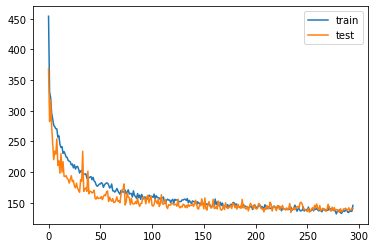

In [13]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Predicting the results of the Test set

In [14]:
y_pred = ann.predict(X_test_fs)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 27.02  37.2 ]
 [  2.55   4.46]
 [ 27.77  41.  ]
 ...
 [ 11.89   0.63]
 [ 10.59   5.  ]
 [ 93.25 100.  ]]


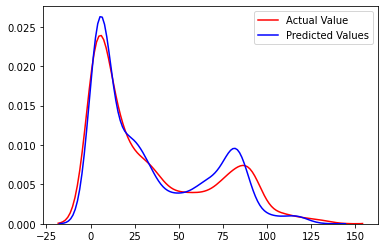

In [15]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

Text(0, 0.5, 'Predicted Critical Temperature (K)')

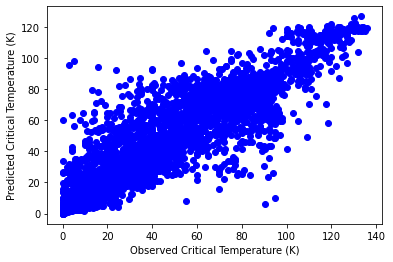

In [16]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

In [17]:
loss_train= np.sqrt(history.history['loss'])
np.mean(loss_train)

12.68377855387172

In [18]:
loss_test= np.sqrt(history.history['val_loss'])
np.mean(loss_test)

12.408356996876508

In [19]:
import tensorflow as tf
from tensorflow import keras
import h5py

# Initialization
model = keras.models.load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               20992     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6